In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import statistics as st
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 26_01_2022 07_33_07.xlsx')

In [5]:
filtrado = dados[['Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado

,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital
0,2020_07,COVID-19,Óbito,0.0
1,2021_10,COVID-19,Cura,12.0
2,2021_08,COVID-19,Cura,4.0
3,2021_01,COVID-19,Óbito,0.0
4,2021_06,COVID-19,Cura,8.0
...,...,...,...,...
164939,2021_01,COVID-19,Cura,0.0
164940,2020_08,COVID-19,Cura,13.0
164941,2020_12,COVID-19,Cura,16.0
164942,2021_02,COVID-19,Óbito,5.0


In [6]:
cura = filtrado.loc[filtrado['Evolucao']=='Cura']
cura = cura.groupby(['Competencia Evolucao']).median()
cura = cura.drop(['2020_03'])
cura = cura.reset_index()
#cura[cura['Sem Epi Evolucao']=='2021_44']

In [7]:
cura = cura['Dias Perm Hospital']

In [8]:
obito = filtrado.loc[filtrado['Evolucao']=='Óbito']
obito = obito.groupby(['Competencia Evolucao']).median()
obito = obito.drop(['2020_03'])
obito = obito.reset_index()
#cura[cura['Sem Epi Evolucao']=='2021_44']

In [9]:
semana = obito['Competencia Evolucao']

In [10]:
obito = obito['Dias Perm Hospital']

In [11]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

In [12]:
legenda = pd.DataFrame(columns=['Óbito','Alta'])

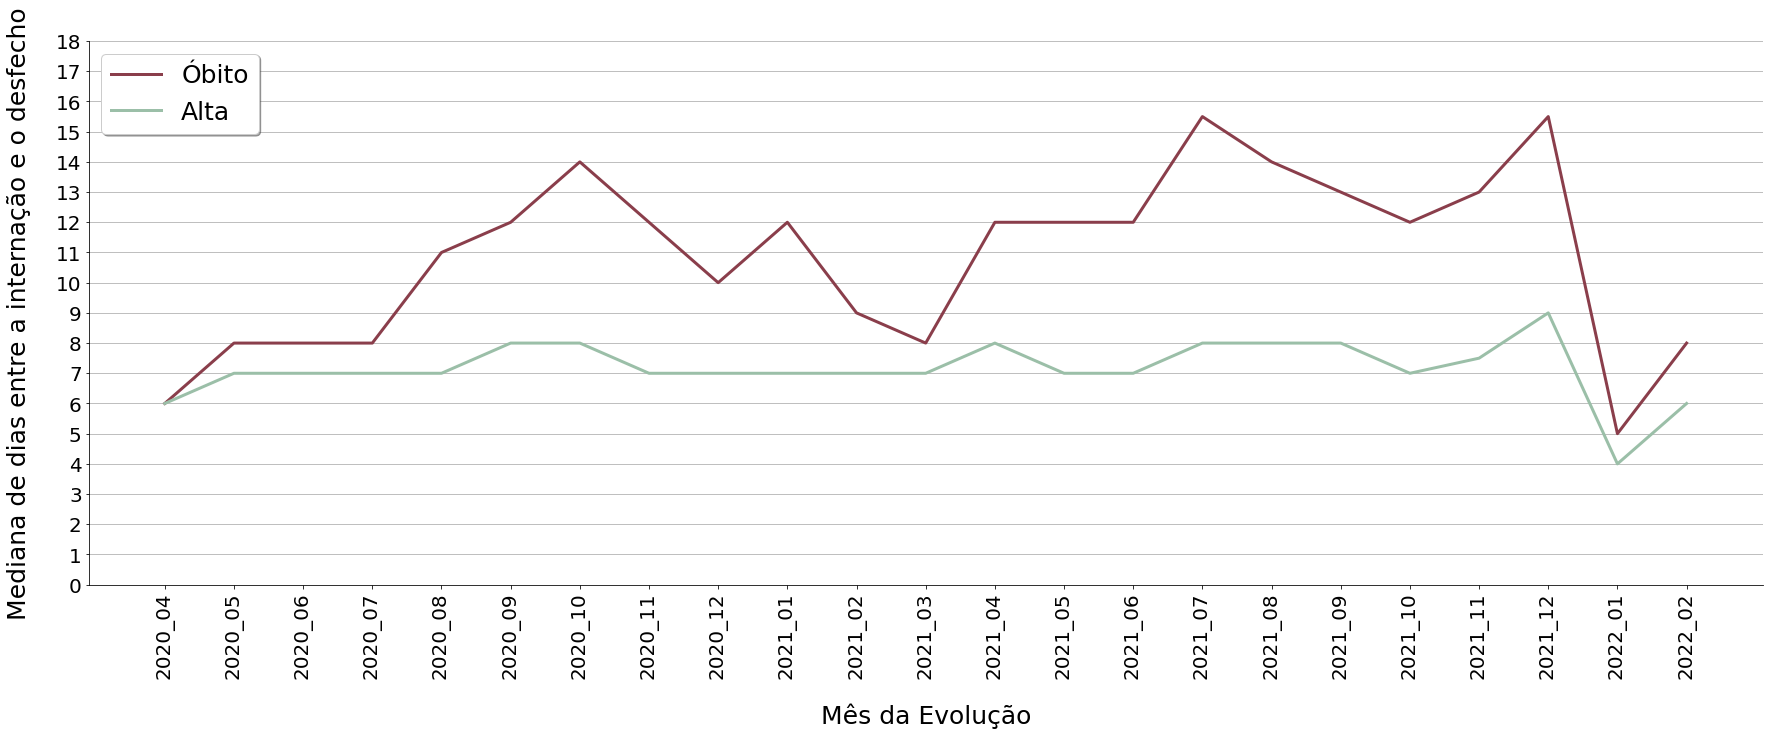

In [13]:
plt.figure(figsize=(30,10))
plt.plot(semana,obito,color='#8a3e4b',linewidth=3)
plt.plot(semana,cura,color='#9bbfa8',linewidth=3)
sns.despine()
plt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)
plt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)
plt.xticks(np.arange(0,np.size(semana),1),rotation=90,fontsize=20)
plt.yticks(np.arange(0,19,1),fontsize=20)
plt.legend(legenda,fontsize=25,shadow=True,loc='upper left')
plt.grid(axis='y')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide9.png',dpi=720,bbox_inches='tight')

In [14]:
grafico_0a59 = dados[['Faixa Etaria','Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital']]
grafico_0a59 = grafico_0a59.loc[grafico_0a59['Classificacao final']=='COVID-19']
grafico_0a59['Faixa Etaria'] = grafico_0a59['Faixa Etaria'].map({'0-9 anos':'0-59 anos','10-19 anos':'0-59 anos','20-29 anos':'0-59 anos','30-39 anos':'0-59 anos','40-49 anos':'0-59 anos',
'50-59 anos':'0-59 anos'})
grafico_0a59 = grafico_0a59.loc[grafico_0a59['Faixa Etaria']=='0-59 anos']
grafico_0a59

,Faixa Etaria,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital
0,0-59 anos,2020_07,COVID-19,Óbito,0.0
2,0-59 anos,2021_08,COVID-19,Cura,4.0
4,0-59 anos,2021_06,COVID-19,Cura,8.0
10,0-59 anos,2021_06,COVID-19,Cura,21.0
13,0-59 anos,NaN,COVID-19,Segue Internado,0.0
...,...,...,...,...,...
164922,0-59 anos,2021_04,COVID-19,Cura,11.0
164929,0-59 anos,2021_06,COVID-19,Óbito,26.0
164932,0-59 anos,2021_04,COVID-19,Óbito,7.0
164938,0-59 anos,2021_06,COVID-19,Cura,33.0


In [15]:
cura_0a59 = grafico_0a59.loc[grafico_0a59['Evolucao']=='Cura']
cura_0a59 = cura_0a59.groupby(['Competencia Evolucao']).median()
cura_0a59 = cura_0a59.drop('2020_03')
cura_0a59 = cura_0a59.reset_index()
cura_0a59 = cura_0a59['Dias Perm Hospital']

In [16]:
obito_0a59 = grafico_0a59.loc[grafico_0a59['Evolucao']=='Óbito']
obito_0a59 = obito_0a59.groupby(['Competencia Evolucao']).median()
obito_0a59 = obito_0a59.reset_index()

In [17]:
semana_0a59 = obito_0a59['Competencia Evolucao']

In [18]:
obito_0a59 = obito_0a59['Dias Perm Hospital']

In [19]:
'''plt.figure(figsize=(30,10))
plt.plot(semana_0a59,obito_0a59,color='#8a3e4b',linewidth=3)
plt.plot(semana_0a59,cura_0a59,color='#9bbfa8',linewidth=3)
sns.despine()
plt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)
plt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)
plt.xticks(np.arange(0,np.size(semana_0a59),1),rotation=90,fontsize=20)
plt.yticks(np.arange(0,25,1),fontsize=20)
plt.legend(legenda,fontsize=25,shadow=True)
plt.grid(axis='y')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide9_0a59 anos.png',dpi=720,bbox_inches='tight')'''

"plt.figure(figsize=(30,10))\nplt.plot(semana_0a59,obito_0a59,color='#8a3e4b',linewidth=3)\nplt.plot(semana_0a59,cura_0a59,color='#9bbfa8',linewidth=3)\nsns.despine()\nplt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)\nplt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)\nplt.xticks(np.arange(0,np.size(semana_0a59),1),rotation=90,fontsize=20)\nplt.yticks(np.arange(0,25,1),fontsize=20)\nplt.legend(legenda,fontsize=25,shadow=True)\nplt.grid(axis='y')\nplt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide9_0a59 anos.png',dpi=720,bbox_inches='tight')"

In [20]:
grafico_60Mais = dados[['Faixa Etaria','Competencia Evolucao','Classificacao final','Evolucao','Dias Perm Hospital']]
grafico_60Mais = grafico_60Mais.loc[grafico_60Mais['Classificacao final']=='COVID-19']
grafico_60Mais['Faixa Etaria'] = grafico_60Mais['Faixa Etaria'].map({'60-69 anos':'60 anos e mais','70-79 anos':'60 anos e mais','80 e mais anos':'60 anos e mais'})
grafico_60Mais = grafico_60Mais.loc[grafico_60Mais['Faixa Etaria']=='60 anos e mais']
grafico_60Mais

,Faixa Etaria,Competencia Evolucao,Classificacao final,Evolucao,Dias Perm Hospital
1,60 anos e mais,2021_10,COVID-19,Cura,12.0
3,60 anos e mais,2021_01,COVID-19,Óbito,0.0
6,60 anos e mais,2021_02,COVID-19,Óbito,5.0
7,60 anos e mais,2021_07,COVID-19,Óbito,0.0
8,60 anos e mais,2021_03,COVID-19,Óbito,0.0
...,...,...,...,...,...
164937,60 anos e mais,2020_07,COVID-19,Óbito,5.0
164939,60 anos e mais,2021_01,COVID-19,Cura,0.0
164940,60 anos e mais,2020_08,COVID-19,Cura,13.0
164941,60 anos e mais,2020_12,COVID-19,Cura,16.0


In [21]:
cura_60Mais = grafico_60Mais.loc[grafico_60Mais['Evolucao']=='Cura']
cura_60Mais = cura_60Mais.groupby(['Competencia Evolucao']).median()
cura_60Mais = cura_60Mais.drop('2020_03')
cura_60Mais = cura_60Mais.reset_index()
cura_60Mais = cura_60Mais['Dias Perm Hospital']

In [22]:
obito_60Mais = grafico_60Mais.loc[grafico_60Mais['Evolucao']=='Óbito']
obito_60Mais = obito_60Mais.groupby(['Competencia Evolucao']).median()
obito_60Mais = obito_60Mais.drop('2020_03')
obito_60Mais = obito_60Mais.reset_index()

In [23]:
semana_60Mais = obito_60Mais['Competencia Evolucao']

In [24]:
obito_60Mais = obito_60Mais['Dias Perm Hospital']

In [25]:
'''plt.figure(figsize=(30,10))
plt.plot(semana_60Mais,obito_60Mais,color='#8a3e4b',linewidth=3)
plt.plot(semana_60Mais,cura_60Mais,color='#9bbfa8',linewidth=3)
sns.despine()
plt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)
plt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)
plt.xticks(np.arange(0,np.size(semana_60Mais),1),rotation=90,fontsize=20)
plt.yticks(np.arange(0,25,1),fontsize=20)
plt.legend(legenda,fontsize=25,shadow=True)
plt.grid(axis='y')
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide9_60Mais anos.png',dpi=720,bbox_inches='tight')'''

"plt.figure(figsize=(30,10))\nplt.plot(semana_60Mais,obito_60Mais,color='#8a3e4b',linewidth=3)\nplt.plot(semana_60Mais,cura_60Mais,color='#9bbfa8',linewidth=3)\nsns.despine()\nplt.xlabel('Mês da Evolução',labelpad=25,fontsize=25)\nplt.ylabel('Mediana de dias entre a internação e o desfecho',labelpad=25,fontsize=25)\nplt.xticks(np.arange(0,np.size(semana_60Mais),1),rotation=90,fontsize=20)\nplt.yticks(np.arange(0,25,1),fontsize=20)\nplt.legend(legenda,fontsize=25,shadow=True)\nplt.grid(axis='y')\nplt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide9_60Mais anos.png',dpi=720,bbox_inches='tight')"